In [ ]:
!pip install praat-parselmouth eng-to-ipa

In [3]:
import parselmouth
import numpy as np
import matplotlib.pyplot as plt
import eng_to_ipa as ipa
from IPython.display import Audio

In [4]:
text = "One is sustained entirely by systematic logical procedures, the other by consensual verification by contemporaries, by their predecessors represented through prevailing traditions, or by posterity for those who expect historic vindication."
ipa.convert(text)


# 'wən ɪz səˈsteɪnd ɪnˈtaɪərli baɪ ˌsɪstəˈmætɪk ˈlɑʤɪkəl prəˈsiʤərz, ðə ˈəðər baɪ kənˈsɛnʃuəl ˌvɛrəfəˈkeɪʃən baɪ kənˈtɛmpərˌɛriz, baɪ ðɛr ˈprɛdəˌsɛsərz ˌrɛprɪˈzɛnɪd θru prɪˈveɪlɪŋ trəˈdɪʃənz, ər baɪ pɑˈstɛrəti fər ðoʊz hu ɪkˈspɛkt hɪˈstɔrɪk vɪndəˈkeɪʃən.'

'wən ɪz səˈsteɪnd ɪnˈtaɪərli baɪ ˌsɪstəˈmætɪk ˈlɑʤɪkəl prəˈsiʤərz, ðə ˈəðər baɪ kənˈsɛnʃuəl ˌvɛrəfəˈkeɪʃən baɪ kənˈtɛmpərˌɛriz, baɪ ðɛr ˈprɛdəˌsɛsərz ˌrɛprɪˈzɛnɪd θru prɪˈveɪlɪŋ trəˈdɪʃənz, ər baɪ pɑˈstɛrəti fər ðoʊz hu ɪkˈspɛkt hɪˈstɔrɪk vɪndəˈkeɪʃən.'

In [5]:
sound_file = "sample_one.mp3"

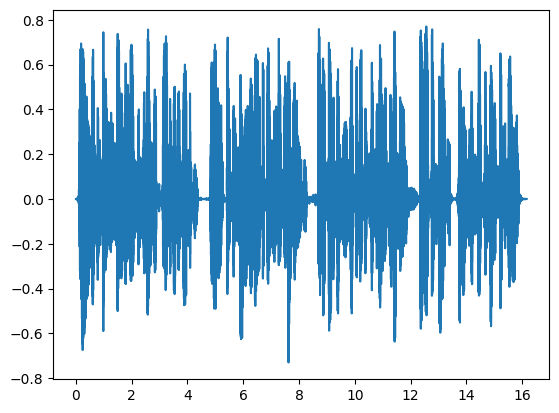

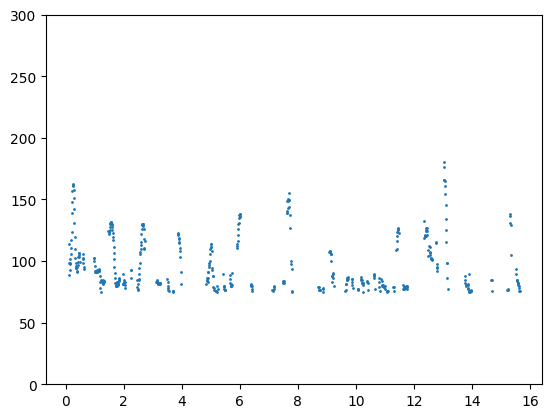

In [6]:
snd = parselmouth.Sound(sound_file)

def draw_pitch(pitch):
    # Extract selected pitch contour, and
    # replace unvoiced samples by NaN to not plot
    pitch_values = pitch.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=1)
    plt.grid(False)
    plt.ylim(0, pitch.ceiling/2) # `/2` remove noise?

def draw(snd):
    plt.figure()
    
    plt.plot(snd.xs(), snd.values.T)
    plt.show() # or plt.savefig("sound.png"), or plt.savefig("sound.pdf")
    
    pitch = snd.to_pitch()
    draw_pitch(pitch)
    plt.show() # or plt.savefig("sound.png"), or plt.savefig("sound.pdf") 

draw(snd)

Audio(data=snd.values, rate=snd.sampling_frequency, autoplay=True)

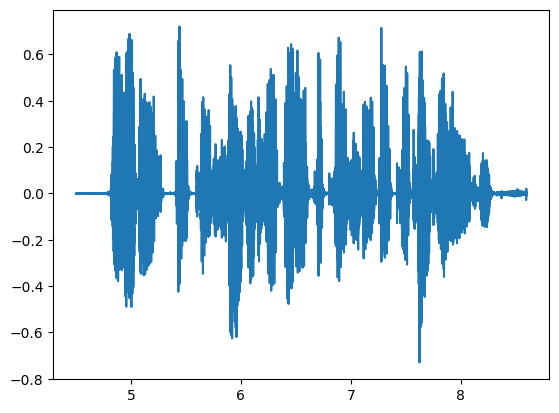

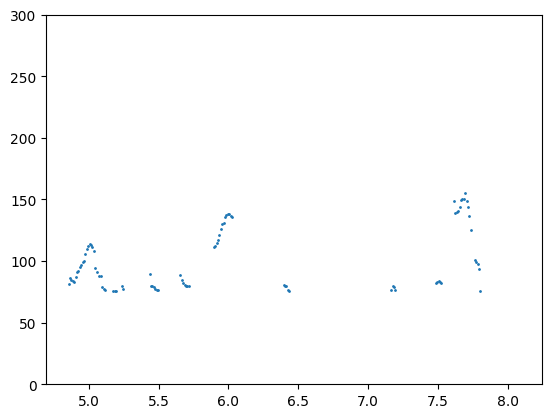

In [7]:
play_from = 4.5
end_with = 8.6

snd_part = snd.extract_part(from_time=play_from, to_time=end_with, preserve_times=True)

draw(snd_part)

Audio(data=snd_part.values, rate=snd_part.sampling_frequency, autoplay=True)